In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df= pd.read_csv('weather_linear_regression_10000.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 10000 non-null  object 
 1   humidity_percent     10000 non-null  float64
 2   pressure_hpa         10000 non-null  float64
 3   wind_speed_kmph      10000 non-null  float64
 4   cloud_cover_percent  10000 non-null  float64
 5   rainfall_mm          10000 non-null  float64
 6   sunshine_hours       10000 non-null  float64
 7   temperature_c        10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


In [2]:
# reading the dataset and creating train and test data
df = df.dropna(subset=["temperature_c"])

X = df.drop(columns=["temperature_c","date"], axis=1)
y = df["temperature_c"]
print(y.shape)
print(y.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

(10000,)
0


In [3]:
df.isna().sum()

date                   0
humidity_percent       0
pressure_hpa           0
wind_speed_kmph        0
cloud_cover_percent    0
rainfall_mm            0
sunshine_hours         0
temperature_c          0
dtype: int64

In [4]:
df.describe()

,humidity_percent,pressure_hpa,wind_speed_kmph,cloud_cover_percent,rainfall_mm,sunshine_hours,temperature_c
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,59.532765,1015.317091,20.002016,49.871338,24.843190,6.037735,57.919811
std,23.010410,20.250619,11.470950,28.899459,14.464209,3.460095,7.200946
min,20.000931,980.011042,0.001925,0.000554,0.000837,0.000101,34.300000
25%,39.706310,997.776206,10.149916,24.685725,12.213611,3.083478,52.900000
50%,59.402289,1015.412774,20.082724,50.003024,24.685860,6.073085,57.870000
75%,79.200508,1032.953545,29.786954,74.711625,37.523852,9.041352,62.950000
max,99.977414,1049.994738,39.996039,99.978937,49.998607,11.999276,82.230000


In [5]:
df.shape

(10000, 8)

In [6]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 10000 non-null  object 
 1   humidity_percent     10000 non-null  float64
 2   pressure_hpa         10000 non-null  float64
 3   wind_speed_kmph      10000 non-null  float64
 4   cloud_cover_percent  10000 non-null  float64
 5   rainfall_mm          10000 non-null  float64
 6   sunshine_hours       10000 non-null  float64
 7   temperature_c        10000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


<Axes: >

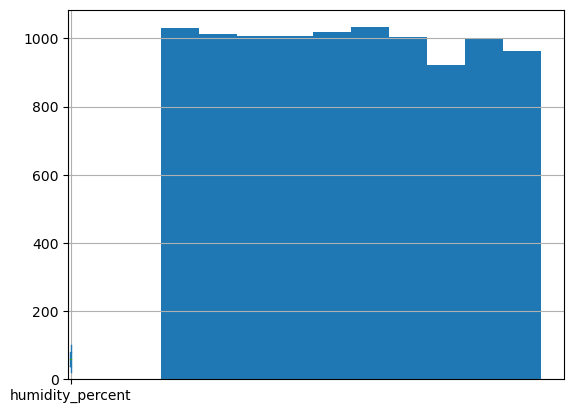

In [7]:
df['humidity_percent'].hist()
df.boxplot(column='humidity_percent')

<Axes: >

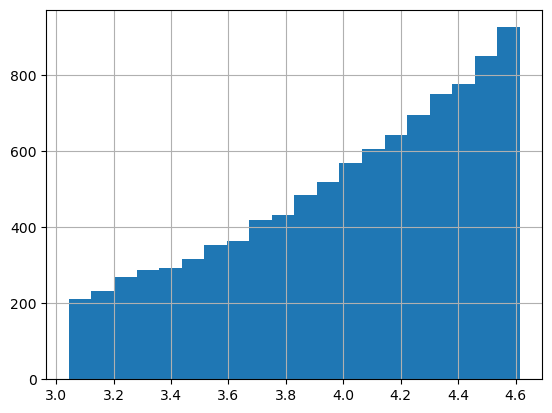

In [8]:
#income is right-skewed - log transform needed
df['humidity_percent'] = np.log(df['humidity_percent']+1)
df['humidity_percent'].hist(bins=20)

<Axes: >

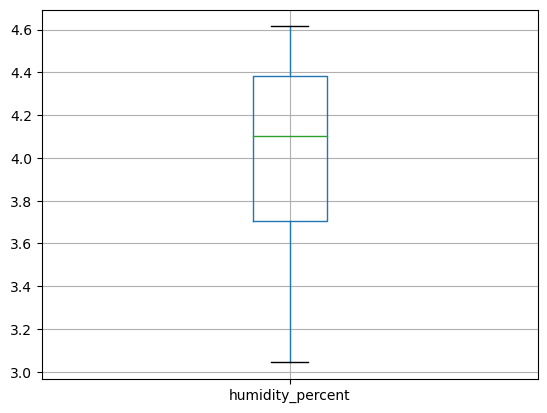

In [9]:
df.boxplot(column='humidity_percent')

<Axes: >

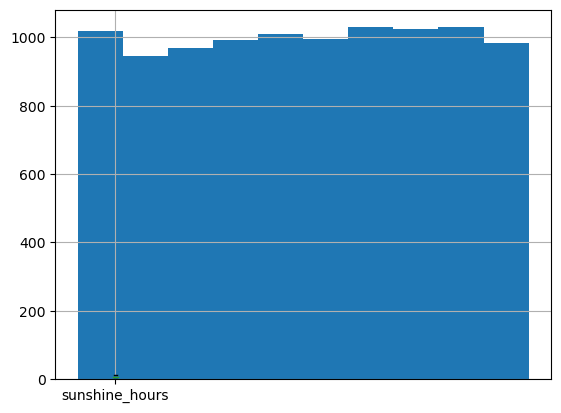

In [10]:
df['sunshine_hours'].hist()
df.boxplot(column='sunshine_hours')

<Axes: >

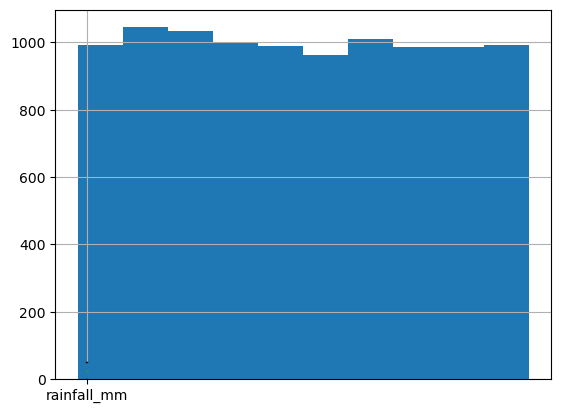

In [11]:
df['rainfall_mm'].hist()
df.boxplot(column='rainfall_mm')

<Axes: >

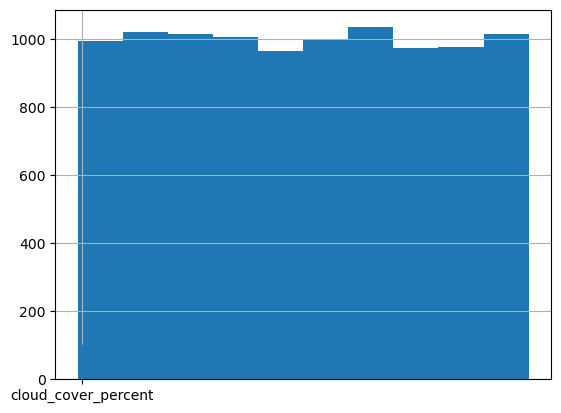

In [12]:
df['cloud_cover_percent'].hist()
df.boxplot(column='cloud_cover_percent')

<Axes: >

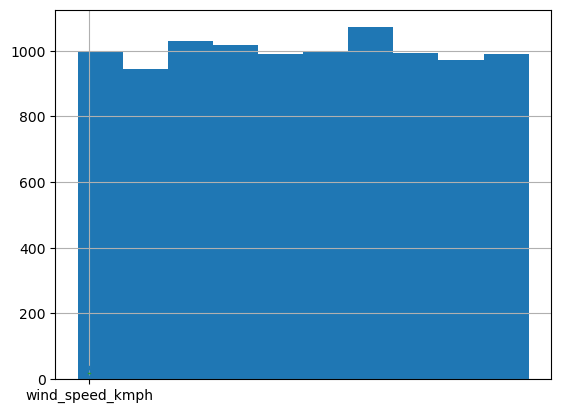

In [13]:
df['wind_speed_kmph'].hist()
df.boxplot(column='wind_speed_kmph')

<Axes: >

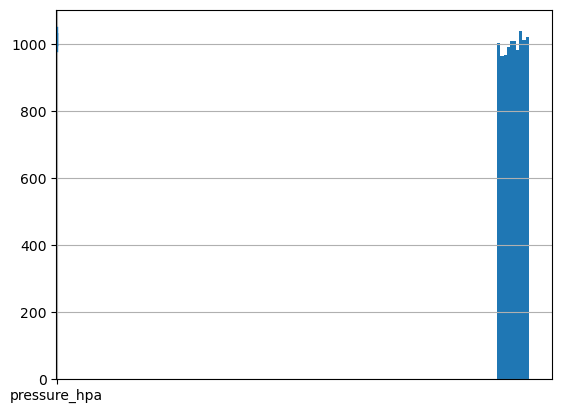

In [14]:
df['pressure_hpa'].hist()
df.boxplot(column='pressure_hpa')

<Axes: >

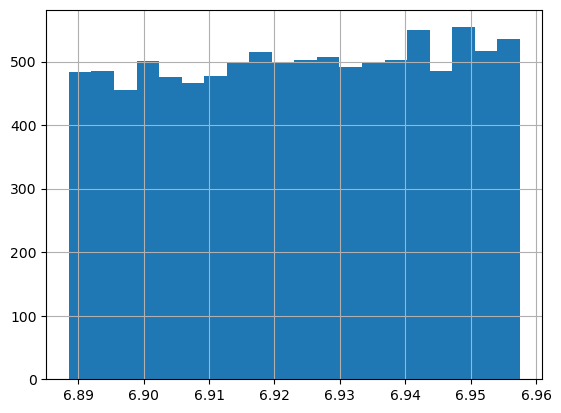

In [15]:
df['pressure_hpa'] = np.log(df['pressure_hpa']+1)
df['pressure_hpa'].hist(bins=20)

<Axes: >

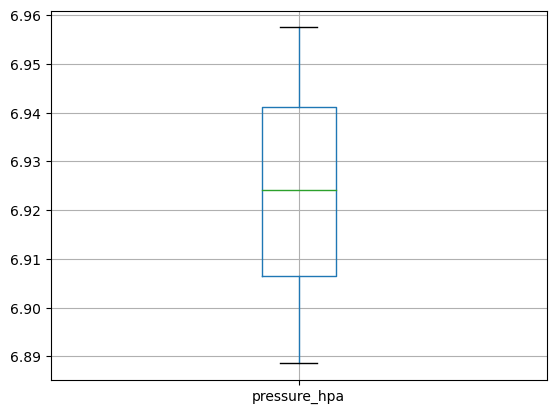

In [16]:
df.boxplot(column='pressure_hpa')

In [17]:
model_pipeline = Pipeline([
    ("model", LinearRegression())
])

In [18]:
print(y.unique())
print(y.dtype)

[63.4  59.14 47.76 ... 66.33 71.12 42.83]
float64


In [19]:
# training the model
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

print(y_pred)
print("----------")
print(y_test)

[53.45541913 56.77353647 55.19859063 ... 59.2129922  61.17322071
 63.1045754 ]
----------
6252    53.02
4684    56.94
1731    53.97
4742    68.22
4521    58.68
        ...  
6412    57.74
8285    58.04
7853    57.83
1095    60.34
6929    64.11
Name: temperature_c, Length: 2000, dtype: float64
